In [24]:
import numpy as np
import operator
import matplotlib # 注意这个也要import一次
import matplotlib.pyplot as plt
from math import log

In [25]:
%matplotlib inline

In [ ]:
'''
pseudo code 
creatBranch()
if so return 'class label'
else
    find best feature for dividing dataset
    divide dataset
    create branch node
        for each divided subset
            add result of creatBranch() to branch node
    return branch node
    
'''

In [3]:
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet:
        currentLabel = featVec[-1] # 每一个特征向量的倒数第一个属性，标签
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    # print(labelCounts)
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob * log(prob,2)
    return shannonEnt

def createDataSet():
    dataSet = [[1,1,'yes'],
              [1,1,'yes'],
              [1,0,'no'],
              [0,1,'no'],
              [0,1,'no']]
    labels = ['no surfacing','flippers']
    return dataSet, labels

def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
       # print(featVec[axis])
        if featVec[axis] == value:
            # 把特征向量中除了轴的属性保留下来
            # reducedFeatVec = featVec[:axis] 
            # reducedFeatVec.extend(featVec[axis+1:]) # extend 是将后面元素扩展
          
            '''
            不能采用 = 来赋值列表，这里是引用赋值，会造成原始数据的修改
            reducedFeatVec = featVec
            应该改为
            reducedFeatVec = featVec[:]
            reducedFeatVec.pop(axis)
            # 用pop和用列表截取的效率问题
            '''
            reducedFeatVec = featVec[:]
            reducedFeatVec.pop(axis)
            retDataSet.append(reducedFeatVec) # append 是将后面元素作为一个新的单元添加
    #print(retDataSet)
    return retDataSet

def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0
    bestFeature = -1
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        # print(featList)
        uniqueVals = set(featList)
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob* calcShannonEnt(subDataSet)
        infoGain = baseEntropy - newEntropy
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.iteritems(),\
                             key = operator.itermgetter(1), reverse=True)
    return sortedClassCount[0][0]

def createTree(dataSet, labels):
    classList = [example[-1] for example in  dataSet]
    # 如果类别完全相同则停止划分
    # 第一类的数量等于所有类的数量
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    # 删除labels[bestFeat] 对其值的引用（这个变量） 传递下去的labels就只有对剩下的值的引用了
    newlabels = labels[:]
    '''
    del(labels[bestFeat])
    # print(labels)
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        # 这里是引用的传递
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet\
                                                  (dataSet,bestFeat,value),subLabels)
    return myTree
    '''
    del(newlabels[bestFeat])
    # print(labels)
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        # 这里是引用的传递
        subLabels = newlabels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet\
                                                  (dataSet,bestFeat,value),subLabels)
    return myTree



In [76]:
# matplotlib注解
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")
# 中文字体配置
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

def plotNode(nodeText, centerPt, parentPt, nodeType):
    createPlot.axl.annotate(nodeText,xy=parentPt,\
                          xycoords='axes fraction',\
                          xytext=centerPt,\
                          textcoords='axes fraction',\
                          va = "center", ha = 'center', bbox=nodeType, arrowprops=arrow_args)
def createPlot():
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    createPlot.axl = plt.subplot(111,frameon=False)
    plotNode(u'决策结点',(0.5,0.1),(0.1,0.5),decisionNode)
    plotNode(u'叶结点',(0.8,0.1),(0.3,0.8),leafNode)
    plt.show()

def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            thisDepth = 1+ getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth

def retrieveTree(i):
    listOfTrees = [{'no surfacing':{0:'no',1:{'flippers':\
                                             {0:'no',1:'yes'}}}},
                  {'no surfacing':{0:'no',1:{'flippers':\
                                             {0:{'head':{0:'no',1:'yes'}},1:'no'}}}}
                  ]
    return listOfTrees[i]

def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.axl.text(xMid,yMid,txtString)

def plotTree(myTree, parentPt, nodeText):
    numLeafs = getNumLeafs(myTree)
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]
    cntrPt = (plotTree.xOff +(1.0 + float(numLeafs))/2.0/plotTree.totalW,\
             plotTree.yOff)
    plotMidText(cntrPt,parentPt,nodeText)
    plotNode(firstStr,cntrPt,parentPt,decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            plotTree(secondDict[key],cntrPt,str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key],(plotTree.xOff, plotTree.yOff),\
                    cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff),cntrPt, str(key))
    plotTree.yOff = plotTree.yOff +1.0/plotTree.totalD
    
def createPlot(inTree):
    fig = plt.figure(1,facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.axl = plt.subplot(111,frameon=False, **axprops)
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5, 1.0), "")
    plt.show()

In [71]:
retrieveTree(0)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [72]:
myTree = retrieveTree(0)
print(myTree)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


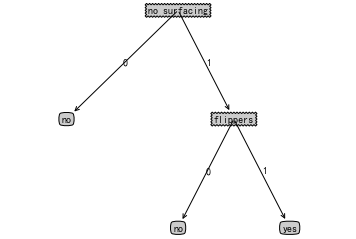

In [77]:
createPlot(myTree)

In [68]:
getNumLeafs(myTree)

3

In [69]:
getTreeDepth(myTree)

2

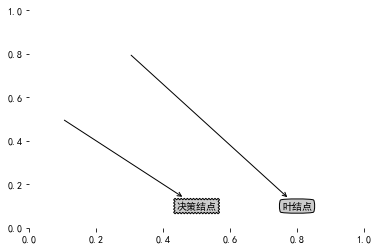

In [42]:
createPlot()

In [18]:
myDat, labels = createDataSet()

In [19]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [11]:
calcShannonEnt(myDat)

{'maybe': 1, 'yes': 1, 'no': 3}


1.3709505944546687

In [10]:
myDat[0][-1]='maybe'

In [57]:
splitDat = splitDataSet(myDat,0,1)

1
1
1
0
0
[[1, 'yes'], [1, 'yes'], [0, 'no']]


In [19]:
splitDat

[[], []]

In [65]:
chooseBestFeatureToSplit(myDat)

0

In [21]:
createTree(myDat,labels)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [22]:
labels

['no surfacing', 'flippers']